crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64
Final coefficients (weights): [nan nan nan nan nan nan nan nan nan nan nan nan nan nan]


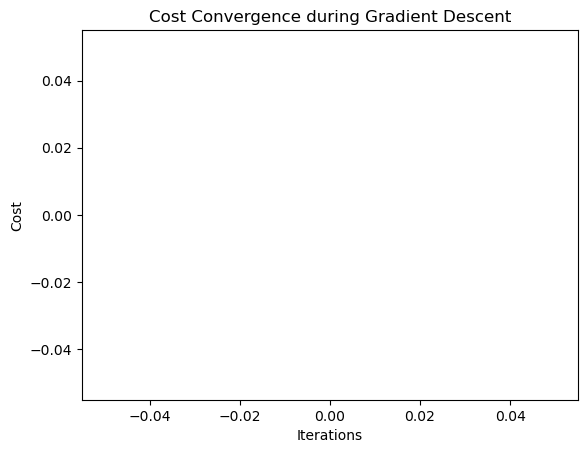

Test MSE: nan


In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (replace 'boston.csv' with the actual path if needed)
data = pd.read_csv("C:\\Users\\zaib unnisa nayeem\\OneDrive\\Desktop\\web\\MLL\\BostonHousing.csv")

# Inspect the first few rows of the dataset
data.head()
print(data.isnull().sum())
# Fill missing values with the median of the column
data_filled = data.fillna(data.median())

# Assuming the dataset has features and a target column (adjust as needed)
# In the Boston Housing dataset, 'MEDV' is typically the target (house prices)
# Drop the target column from X and keep it in y
X = data.drop('medv', axis=1)  # Replace 'MEDV' with the actual target column if different
y = data['medv']

# Normalize features (optional but recommended for gradient descent)
X = (X - X.mean()) / X.std()

# Add a bias term (intercept) to X
X.insert(0, 'Bias', 1)

# Convert to NumPy arrays for faster computation
X = np.array(X)
y = np.array(y)

# Split data into training and test sets manually (80% train, 20% test)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Initialize parameters (weights)
num_features = X_train.shape[1]
beta = np.zeros(num_features)  # Coefficients (weights)

# Elastic Net hyperparameters
alpha = 0.1  # Regularization strength
l1_ratio = 0.5  # Mix ratio between L1 and L2 regularization

# Gradient Descent settings
learning_rate = 0.001
num_iterations = 1000

# To store cost history
cost_history = []

# Define the cost function with L1 and L2 regularization (ElasticNet)
def compute_cost(X, y, beta, alpha, l1_ratio):
    # Calculate predictions
    predictions = X.dot(beta)
    
    # Calculate the mean squared error (MSE)
    mse = (1 / len(y)) * np.sum((predictions - y) ** 2)
    
    # L1 (Lasso) regularization term
    l1_penalty = l1_ratio * np.sum(np.abs(beta))
    
    # L2 (Ridge) regularization term
    l2_penalty = (1 - l1_ratio) * np.sum(beta ** 2)
    
    # Combine MSE and regularization penalties
    total_cost = mse + alpha * (l1_penalty + l2_penalty)
    
    return total_cost

# Gradient Descent with ElasticNet regularization
def gradient_descent(X, y, beta, alpha, l1_ratio, learning_rate, num_iterations):
    m = len(y)  # Number of training examples
    
    for i in range(num_iterations):
        # Predictions
        predictions = X.dot(beta)
        
        # Compute gradient
        gradient = (1 / m) * X.T.dot(predictions - y)
        
        # Update beta (coefficients)
        beta -= learning_rate * gradient
        
        # Apply ElasticNet regularization terms
        l1_penalty = alpha * l1_ratio * np.sign(beta)
        l2_penalty = alpha * (1 - l1_ratio) * beta
        beta -= learning_rate * (l1_penalty + l2_penalty)
        
        # Save the cost for this iteration
        cost = compute_cost(X, y, beta, alpha, l1_ratio)
        cost_history.append(cost)
    
    return beta

# Train the model
beta = gradient_descent(X_train, y_train, beta, alpha, l1_ratio, learning_rate, num_iterations)

# Print the final coefficients
print("Final coefficients (weights):", beta)

# Plot the cost history to visualize convergence
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Convergence during Gradient Descent')
plt.show()

# Make predictions on the test set
y_pred = X_test.dot(beta)

# Calculate Mean Squared Error on the test set
mse_test = np.mean((y_pred - y_test) ** 2)
print(f"Test MSE: {mse_test}")


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv 

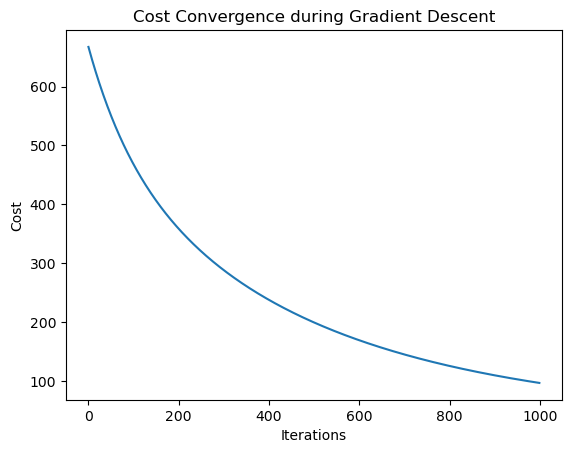

Test MSE: 349.7256472898349


In [9]:
# Load dataset (replace 'boston.csv' with the actual path if needed)
data = pd.read_csv(r"C:\Users\zaib unnisa nayeem\OneDrive\Desktop\web\MLL\BostonHousing.csv")

# Inspect the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Handle missing values (choose one method)
data_filled = data.fillna(data.mean())  # Fill missing values with mean
# OR
# data_filled = data.dropna()  # Remove rows with any missing values

# Verify that there are no more missing values
print(data_filled.isnull().sum())  # Should print all zeros

# Split features and target
X = data_filled.drop('medv', axis=1)  # Replace 'MEDV' with the actual target column if different
y = data_filled['medv']

# Normalize features (standardization)
X = (X - X.mean()) / X.std()

# Check if standardization worked: print mean and standard deviation of the features
print("Feature Means after standardization:")
print(X.mean(axis=0))  # Should be close to 0

print("\nFeature Standard Deviations after standardization:")
print(X.std(axis=0))  # Should be close to 1

# Add a bias term (intercept) to X
X.insert(0, 'Bias', 1)

# Convert to NumPy arrays for faster computation
X = np.array(X)
y = np.array(y)

# Split data into training and test sets manually (80% train, 20% test)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Initialize parameters (weights)
num_features = X_train.shape[1]
beta = np.zeros(num_features)  # Coefficients (weights)

# Elastic Net hyperparameters
alpha = 0.001  # Regularization strength
l1_ratio = 0.5  # Mix ratio between L1 and L2 regularization

# Gradient Descent settings
learning_rate = 0.001  # Reduced learning rate
num_iterations = 1000

# To store cost history
cost_history = []

# Define the cost function with L1 and L2 regularization (ElasticNet)
def compute_cost(X, y, beta, alpha, l1_ratio):
    # Calculate predictions
    predictions = X.dot(beta)
    
    # Calculate the mean squared error (MSE)
    mse = (1 / len(y)) * np.sum((predictions - y) ** 2)
    
    # L1 (Lasso) regularization term
    l1_penalty = l1_ratio * np.sum(np.abs(beta))
    
    # L2 (Ridge) regularization term
    l2_penalty = (1 - l1_ratio) * np.sum(beta ** 2)
    
    # Combine MSE and regularization penalties
    total_cost = mse + alpha * (l1_penalty + l2_penalty)
    
    return total_cost

# Gradient Descent with ElasticNet regularization
def gradient_descent(X, y, beta, alpha, l1_ratio, learning_rate, num_iterations):
    m = len(y)  # Number of training examples
    
    for i in range(num_iterations):
        # Predictions
        predictions = X.dot(beta)
        
        # Compute gradient
        gradient = (1 / m) * X.T.dot(predictions - y)
        
        # Update beta (coefficients)
        beta -= learning_rate * gradient
        
        # Apply ElasticNet regularization terms
        l1_penalty = alpha * l1_ratio * np.sign(beta)
        l2_penalty = alpha * (1 - l1_ratio) * beta
        beta -= learning_rate * (l1_penalty + l2_penalty)
        
        # Save the cost for this iteration
        cost = compute_cost(X, y, beta, alpha, l1_ratio)
        cost_history.append(cost)
        
        # Debugging: print cost every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost}")

    return beta

# Train the model
beta = gradient_descent(X_train, y_train, beta, alpha, l1_ratio, learning_rate, num_iterations)

# Print the final coefficients
print("Final coefficients (weights):", beta)

# Plot the cost history to visualize convergence
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Convergence during Gradient Descent')
plt.show()

# Make predictions on the test set
y_pred = X_test.dot(beta)

# Calculate Mean Squared Error on the test set
mse_test = np.mean((y_pred - y_test) ** 2)
print(f"Test MSE: {mse_test}")


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv 

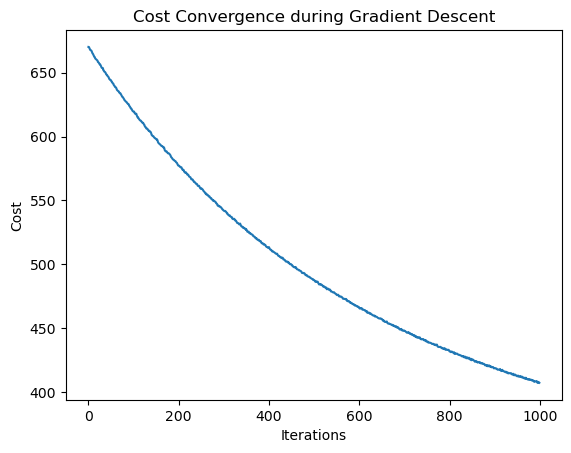

Test MSE: 76.7859617594534
Iteration 0, Cost: 667.218905573802
Iteration 100, Cost: 467.8285832309222
Iteration 200, Cost: 358.5168910526485
Iteration 300, Cost: 288.20479648275324
Iteration 400, Cost: 237.81648379294236
Iteration 500, Cost: 199.44667813854622
Iteration 600, Cost: 169.28386558794062
Iteration 700, Cost: 145.15735438633249
Iteration 800, Cost: 125.65110971768534
Iteration 900, Cost: 109.7577099701738
Alpha: 0.0001, L1 Ratio: 0.0, Test MSE: 349.7378867778213
Iteration 0, Cost: 667.2189238829698
Iteration 100, Cost: 467.82881973369945
Iteration 200, Cost: 358.5159192089478
Iteration 300, Cost: 288.2022373572934
Iteration 400, Cost: 237.81223991556064
Iteration 500, Cost: 199.44075119120177
Iteration 600, Cost: 169.27635665628694
Iteration 700, Cost: 145.14833410575477
Iteration 800, Cost: 125.64066531792375
Iteration 900, Cost: 109.74594682676064
Alpha: 0.0001, L1 Ratio: 0.5, Test MSE: 349.7297409480176
Iteration 0, Cost: 667.2189421920699
Iteration 100, Cost: 467.8290562

In [11]:
# Load dataset (replace 'boston.csv' with the actual path if needed)
data = pd.read_csv(r"C:\Users\zaib unnisa nayeem\OneDrive\Desktop\web\MLL\BostonHousing.csv")

# Inspect the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Handle missing values (choose one method)
data_filled = data.fillna(data.mean())  # Fill missing values with mean
# OR
# data_filled = data.dropna()  # Remove rows with any missing values

# Verify that there are no more missing values
print(data_filled.isnull().sum())  # Should print all zeros

# Split features and target
X = data_filled.drop('medv', axis=1)  # Replace 'MEDV' with the actual target column if different
y = data_filled['medv']

# Normalize features (standardization)
X = (X - X.mean()) / X.std()

# Check if standardization worked: print mean and standard deviation of the features
print("Feature Means after standardization:")
print(X.mean(axis=0))  # Should be close to 0

print("\nFeature Standard Deviations after standardization:")
print(X.std(axis=0))  # Should be close to 1

# Add a bias term (intercept) to X
X.insert(0, 'Bias', 1)

# Convert to NumPy arrays for faster computation
X = np.array(X)
y = np.array(y)

# Split data into training and test sets manually (80% train, 20% test)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Initialize parameters (weights)
num_features = X_train.shape[1]
beta = np.zeros(num_features)  # Coefficients (weights)

# Elastic Net hyperparameters
alpha = 10.0  # Regularization strength
l1_ratio = 1.0  # Mix ratio between L1 and L2 regularization

# Gradient Descent settings
learning_rate = 0.001  # Reduced learning rate
num_iterations = 1000

# To store cost history
cost_history = []

# Define the cost function with L1 and L2 regularization (ElasticNet)
def compute_cost(X, y, beta, alpha, l1_ratio):
    predictions = X.dot(beta)
    mse = (1 / len(y)) * np.sum((predictions - y) ** 2)
    l1_penalty = l1_ratio * np.sum(np.abs(beta))
    l2_penalty = (1 - l1_ratio) * np.sum(beta ** 2)
    total_cost = mse + alpha * (l1_penalty + l2_penalty)
    return total_cost

# Gradient Descent with ElasticNet regularization
def gradient_descent(X, y, beta, alpha, l1_ratio, learning_rate, num_iterations):
    m = len(y)
    for i in range(num_iterations):
        predictions = X.dot(beta)
        gradient = (1 / m) * X.T.dot(predictions - y)
        beta -= learning_rate * gradient
        l1_penalty = alpha * l1_ratio * np.sign(beta)
        l2_penalty = alpha * (1 - l1_ratio) * beta
        beta -= learning_rate * (l1_penalty + l2_penalty)
        cost = compute_cost(X, y, beta, alpha, l1_ratio)
        cost_history.append(cost)
        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost}")
    return beta

# Train the model
beta = gradient_descent(X_train, y_train, beta, alpha, l1_ratio, learning_rate, num_iterations)

# Print the final coefficients
print("Final coefficients (weights):", beta)

# Plot the cost history to visualize convergence
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Convergence during Gradient Descent')
plt.show()

# Make predictions on the test set
y_pred = X_test.dot(beta)

# Calculate Mean Squared Error on the test set
mse_test = np.mean((y_pred - y_test) ** 2)
print(f"Test MSE: {mse_test}")

# Hyperparameter tuning section
best_mse = float('inf')
best_params = None

for alpha in [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]:
    for l1_ratio in [0.0, 0.5, 1.0]:
        beta = np.zeros(num_features)  # Reset coefficients
        beta = gradient_descent(X_train, y_train, beta, alpha, l1_ratio, learning_rate, num_iterations)
        y_pred = X_test.dot(beta)
        mse_test = np.mean((y_pred - y_test) ** 2)

        print(f"Alpha: {alpha}, L1 Ratio: {l1_ratio}, Test MSE: {mse_test}")

        if mse_test < best_mse:
            best_mse = mse_test
            best_params = (alpha, l1_ratio)

print(f"Best Params - Alpha: {best_params[0]}, L1 Ratio: {best_params[1]}, Best Test MSE: {best_mse}")


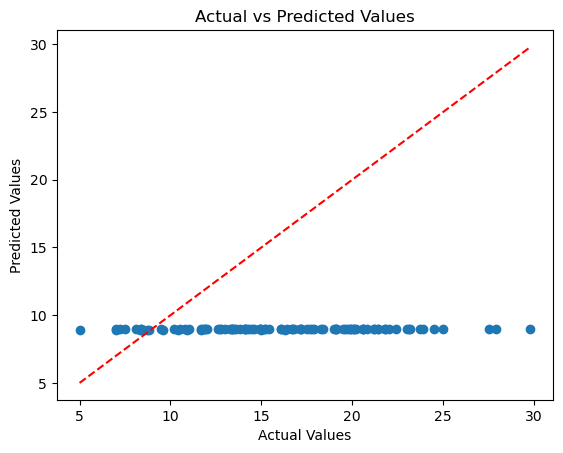

In [12]:
# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect prediction
plt.show()


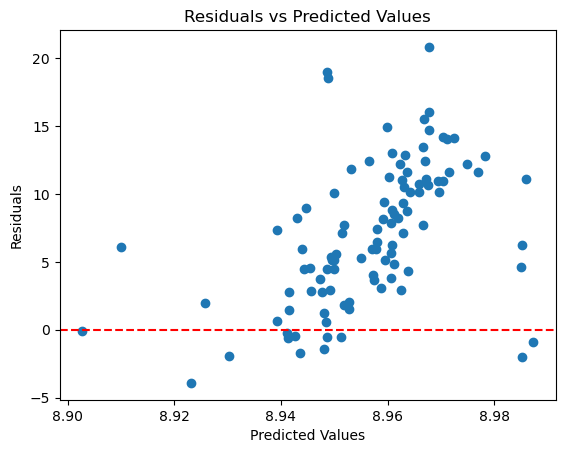

In [13]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()
